In [29]:
import cv2 as cv

from IPython.display import Image

In [30]:
beach = cv.imread('beach1.jpg')

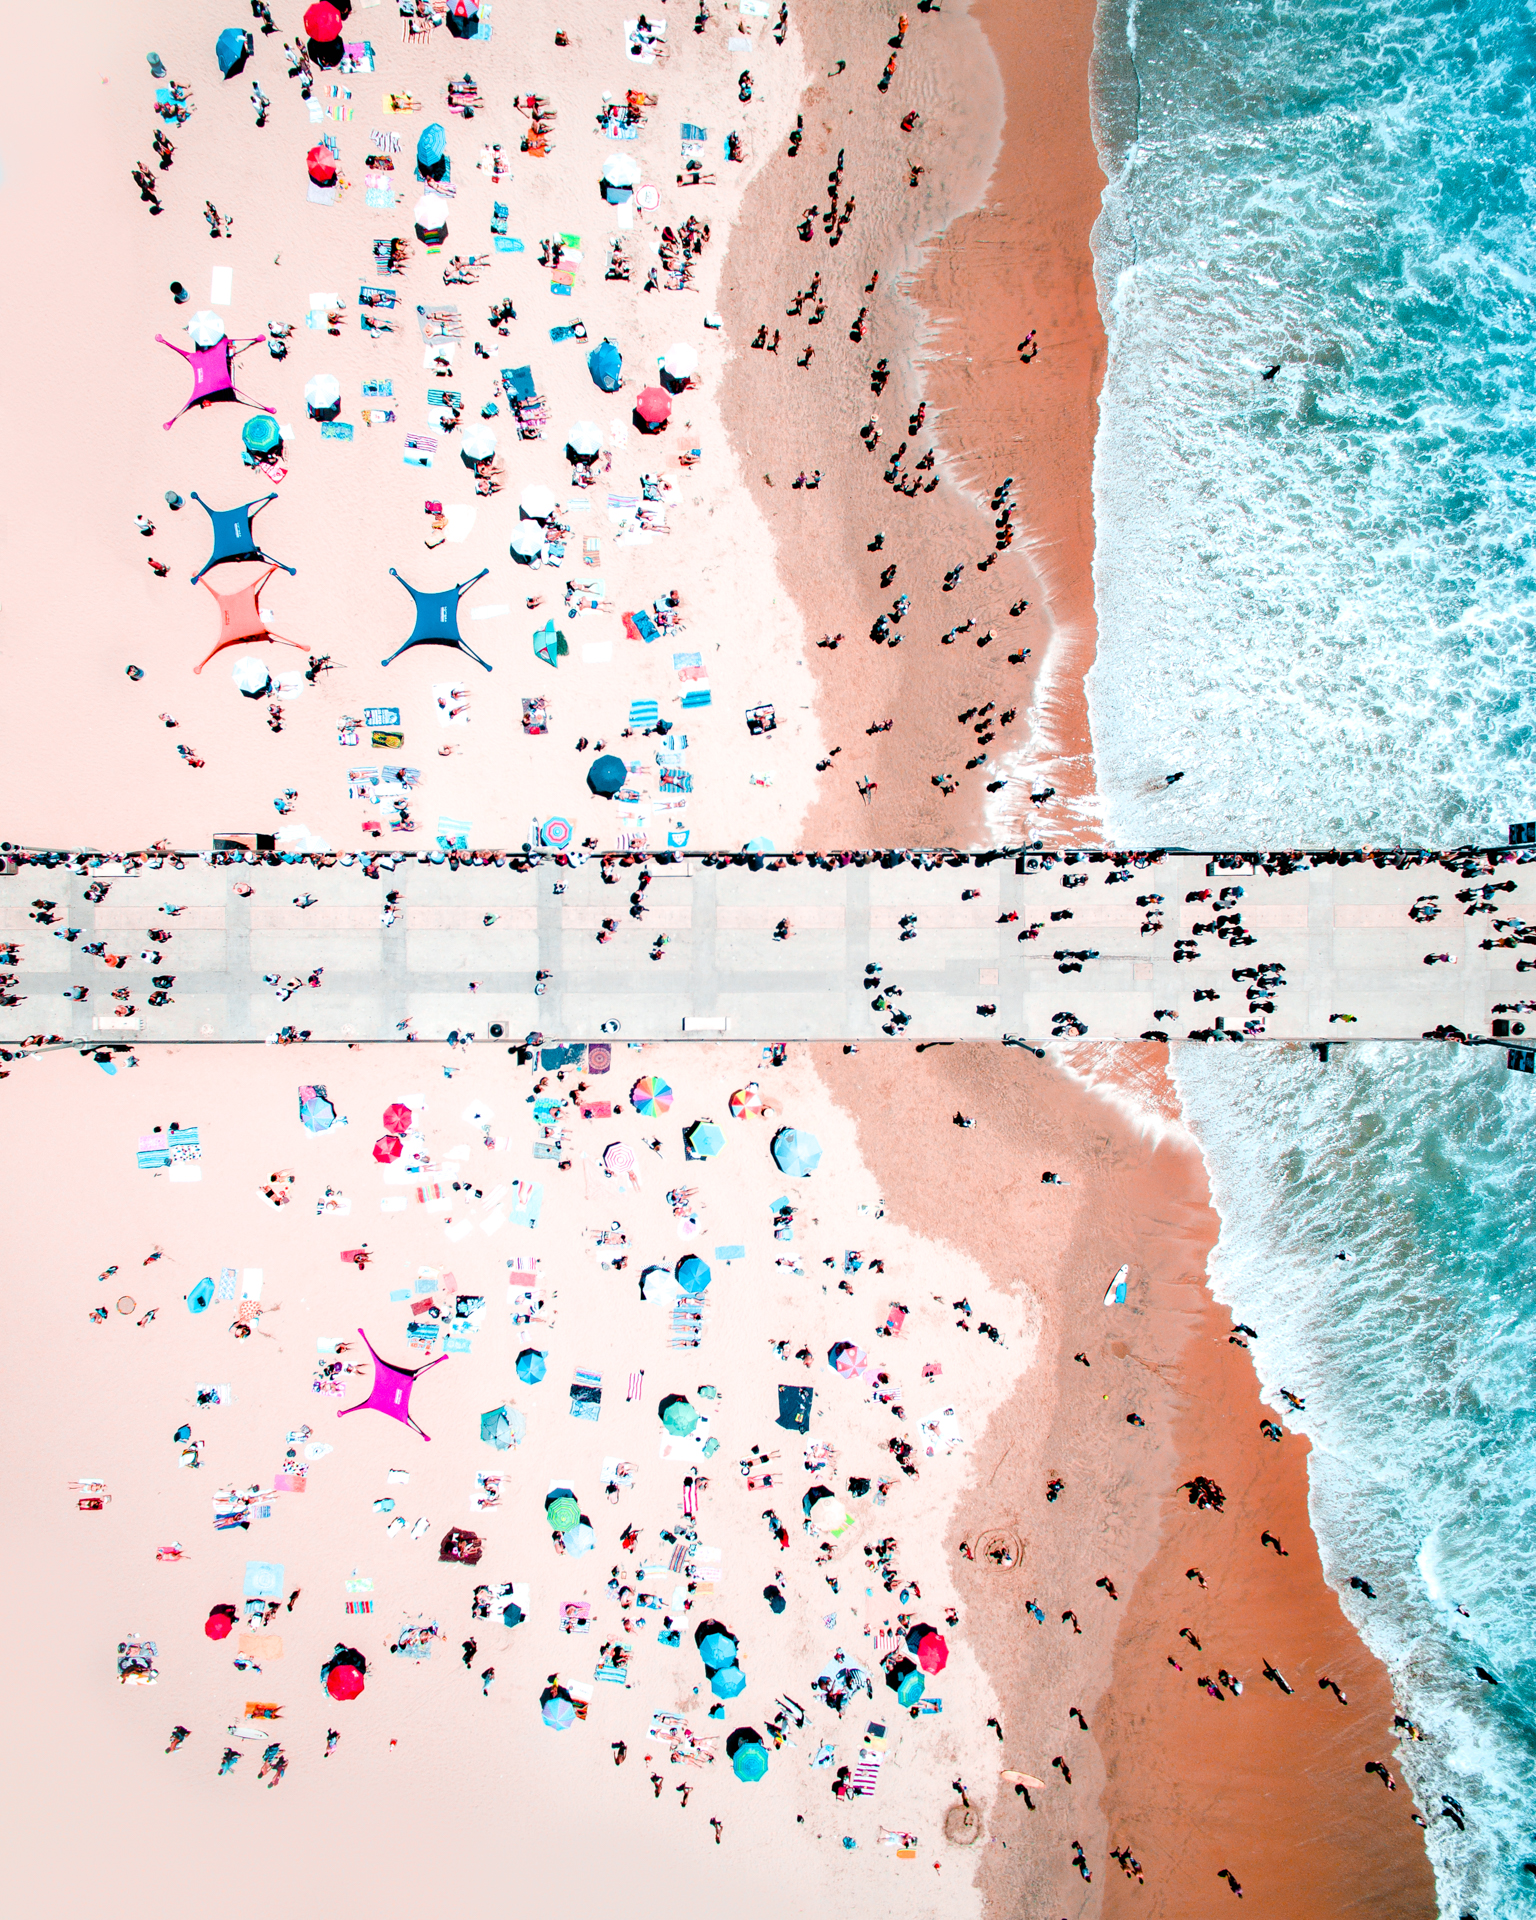

In [31]:
Image(filename='beach1.jpg')

In [32]:
grayBeach = cv.cvtColor(beach, cv.COLOR_BGR2GRAY)
grayBeach

array([[232, 232, 232, ..., 162, 180, 162],
       [232, 232, 232, ..., 168, 165, 148],
       [232, 232, 232, ..., 181, 184, 172],
       ...,
       [226, 227, 226, ..., 186, 205, 214],
       [226, 227, 226, ..., 216, 231, 234],
       [227, 227, 226, ..., 218, 229, 230]], dtype=uint8)

In [33]:
print("Shape of the grayBeach image:")
grayBeach.shape

Shape of the grayBeach image:


(1920, 1536)

In [34]:
def findDarkSpots(img, limit=50):
    """ Find spots darker than the limit in the grayscale img."""
    posList = []
    for row in range(len(img)):
        for col in range(len(img[0])):
            if (img[row][col] <= limit):
                pos = (row, col, img[row][col])
                posList.append(pos)
    return posList          

In [35]:
darkSpotPos = findDarkSpots(grayBeach, 30)
print("Number of dark spots in image:" )
len(darkSpotPos)

Number of dark spots in image:


50125

In [36]:
def drawCenters(frame, centers):
    """ Draws centers onto frames."""
    # https://www.programcreek.com/python/example/77058/cv2.KeyPoint
    keypoints = [];
    for center in centers:
        y = center[0]
        x = center[1]
        keypoints.append(cv.KeyPoint(x=x,y=y,_size=10))
    kpFrame = cv.drawKeypoints(frame, keypoints, None, color=(0, 255, 0))
    return kpFrame

In [37]:
drawnBeach = drawCenters(grayBeach, darkSpotPos)

In [38]:
cv.imwrite('test.jpg',drawnBeach);

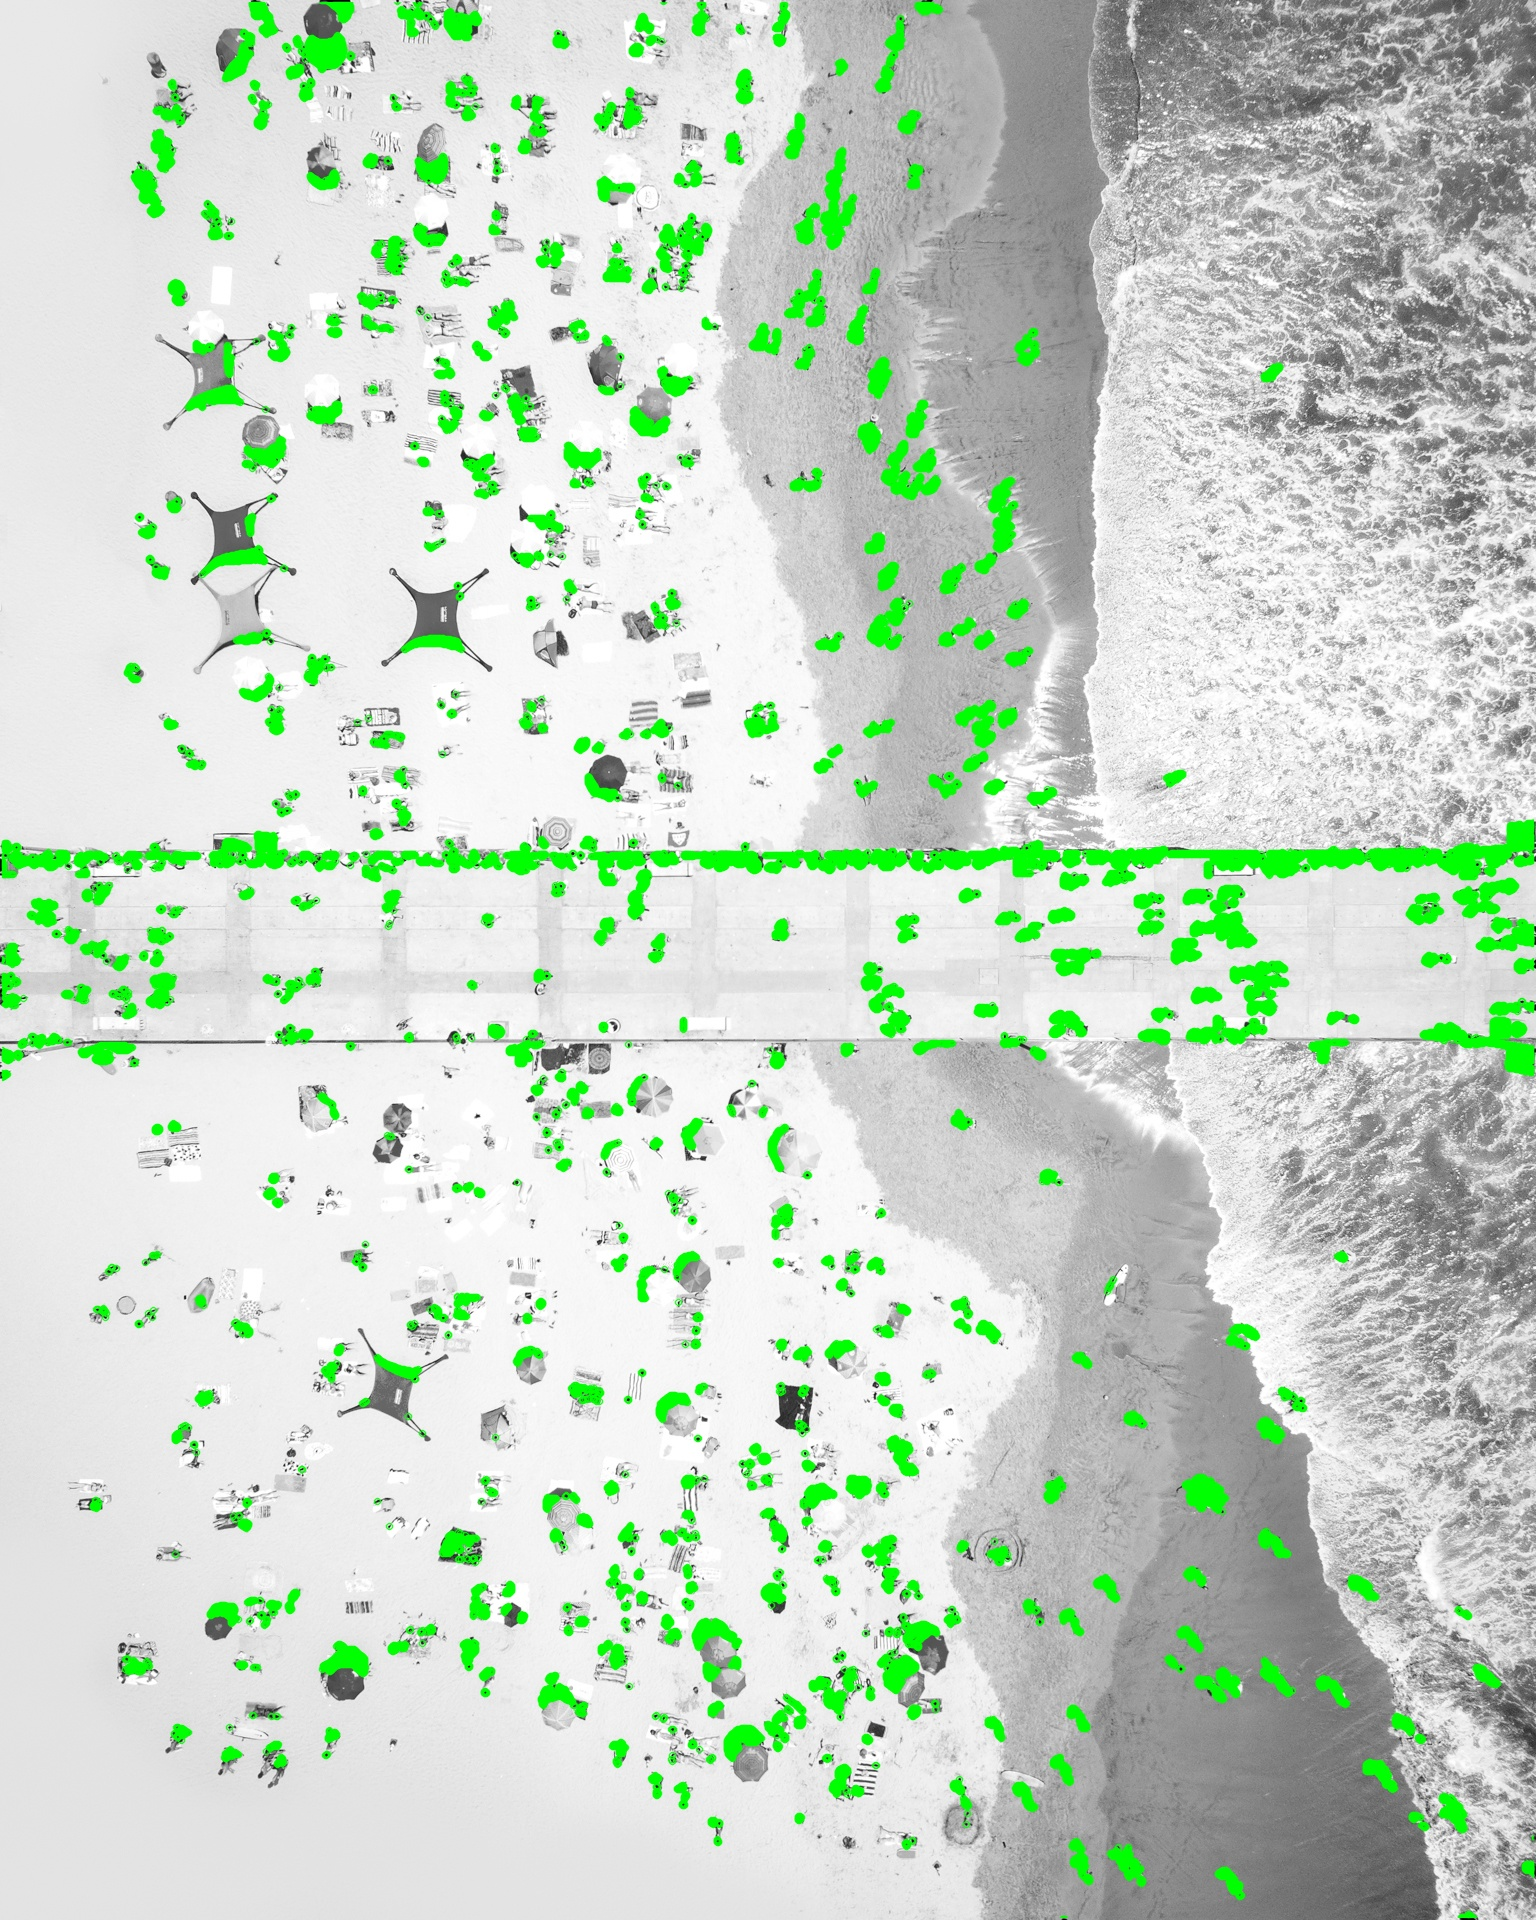

In [39]:
Image(filename='test.jpg')

In [40]:
def euclideanDistance(pointA, pointB):
    """ Finds euclidean distance from point A to point B."""
    x = pointA[0] - pointB[0]
    y = pointA[1] - pointB[1]
    return (x**2 + y**2)**.5

In [49]:
def greedySetCoverAlgorithm(points, trashcanCount = 5, trashDist = 200):
    """ Greedy algorithm for set cover. Takes key points and we want to get the most objects
    we can with each iteration."""
    
    sets = []
    while points and trashcanCount >= 0: 
        maxPoints = []
        count = 0
        for point in points:
            tempSet = [point]
            for otherPoint in points:
                if otherPoint != point and euclideanDistance(point, otherPoint) < trashDist:
                    tempSet.append(otherPoint)
            if len(tempSet) > len(maxPoints):
                maxPoints = tempSet
        sets.append(maxPoints)
        
        for point in maxPoints:
            for p in range(len(points)):
                if euclideanDistance(point, points[p]) == 0:
                    points.pop(p)
                    break;
            trashcanCount -= 1;
    return sets

In [50]:
sets = greedySetCoverAlgorithm(darkSpotPos)

KeyboardInterrupt: 